## Постановка Задачи

Человек записывается на прием к врачу, получает все указания и не приходит. Кого в этом винить? \
Почему 30% пациентов пропускают запланированные приемы?

Необходимо выяснить, какие факторы влияют на пропуски по записи на прием к врачу.

Ответить на этот вопрос нам помогут данные о приемах к врачу с указанием характеристик.

Данные содержат следующие столбцы:
*   *PatientId* — идентификация пациента;
*   *AppointmentID* - идентификация каждой встречи;
*   *Gender* - пол пациента;
*   *ScheduleDay* - день приема;
*   *AppointmentDay* - день регистрации на прием;
*   *Age* - возраст пациента;
*   *Neighbourhood* - назначение / место приема;
*   *Scholarship* - стипендия;
    - да (1) или нет (0)
*   *Hipertension* - наличие гипертонии;
    - да (1) или нет (0)
*   *Diabetes* - наличие диабета;
    - да (1) или нет (0)
*   *Alcoholism* - алкоголизм;
    - да (1) или нет (0)
*   *Handcap* - физический или психический недостаток;
    - да (1) или нет (0)
*   *SMS_received* - количество отправленных сообщений;
*   *No-show* - неявка
    - да (1) или нет (0)

Источник датасета: ['Medical Appointment No Shows' (kaggle.com)](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

#### Импортируем Библиотеки

In [2]:
#import the libraries
import pandas as pd, numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from comet_ml import Experiment

In [ ]:
#create an experiment using individual API key
experiment = Experiment(
    api_key='',
    project_name='medical-appointment',
    workspace='tori938',
)

#### Загрузка Данных

In [86]:
no_show_at_medical = pd.read_csv('data/KaggleV2-May-2016.csv')

#check that the data set was imported correctly
no_show_at_medical.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


#### Распределение Числовых Признаков

{'web': 'https://www.comet.com/api/image/download?imageId=12d97d30ab4e4d7da4b37f71d4c47387&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=12d97d30ab4e4d7da4b37f71d4c47387&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '12d97d30ab4e4d7da4b37f71d4c47387'}

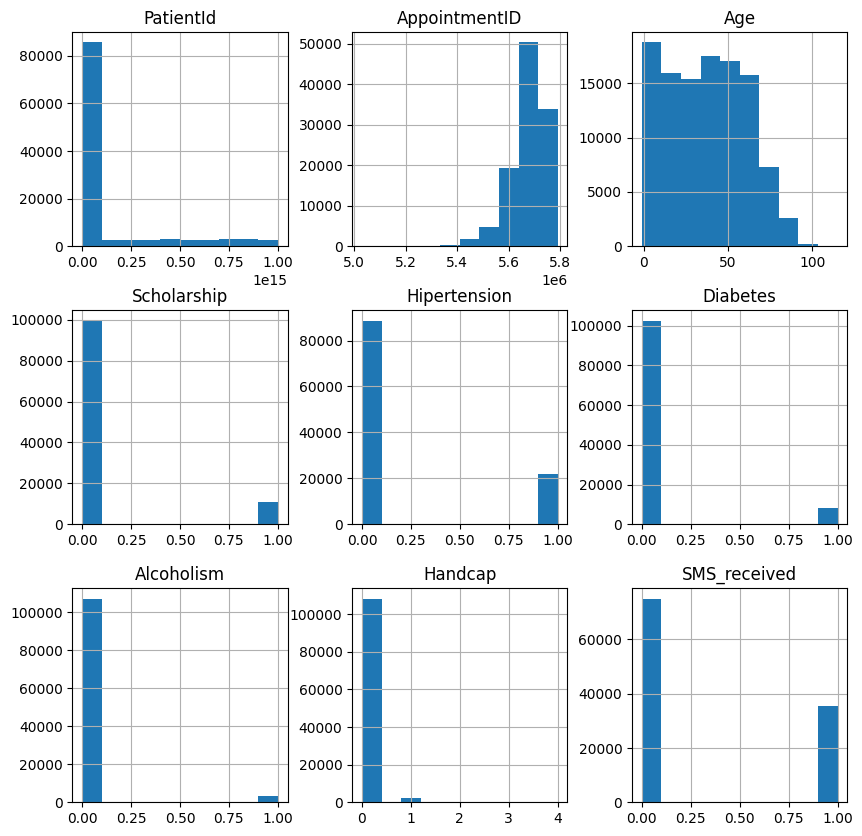

In [87]:
#create a histogram to show the distribution of numerical features
no_show_at_medical.hist(figsize=(10, 10));

#log the histogram
experiment.log_figure(figure=plt)

### Описательный Анализ Данных

In [88]:
print(f'Размер таблицы: {no_show_at_medical.shape}')

Размер таблицы: (110527, 14)


In [89]:
#find the columns
list(no_show_at_medical)

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [90]:
#basic information about the data set
no_show_at_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Проверим данные на наличие пропусков:

In [91]:
#check that there are no null values in the data set
no_show_at_medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Вывод:** \
В датасете 110527 записей (без пропущенных значений).

In [92]:
#find unique values
print('Values in Gender:', no_show_at_medical.Gender.unique())
print()
print('Values in Neighbourhood:', no_show_at_medical.Neighbourhood.unique())
print()
print('Values in Scholarship:', no_show_at_medical.Scholarship.unique())
print()
print('Values in Hypertension:', no_show_at_medical.Hipertension.unique())
print()
print('Values in Diabetes:', no_show_at_medical.Diabetes.unique())
print()
print('Values in Alcoholism:', no_show_at_medical.Alcoholism.unique())
print()
print('Values in Handicap:', no_show_at_medical.Handcap.unique())
print()
print('Values in SMS_received:', no_show_at_medical.SMS_received.unique())
print()
print('Values in No_Show:', no_show_at_medical['No-show'].unique())

Values in Gender: ['F' 'M']

Values in Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TERE

In [93]:
#find the number of unique values in Neighbourhood
print(f'Количество уникальных записей для Neighbourhood: {no_show_at_medical.Neighbourhood.nunique()}')

Количество уникальных записей для Neighbourhood: 81


### Преобразование Данных

##### Проверим данные на наличие дубликатов:

In [94]:
print(f'Количество дубликатов: {no_show_at_medical[no_show_at_medical.duplicated()].shape[0]}')

#delete the duplicates
no_show_at_medical = no_show_at_medical.drop_duplicates()

# check for returning patients
duplicated_patient_id = no_show_at_medical['PatientId'][no_show_at_medical['PatientId'].duplicated() == True].count()
print('Количество постоянных пациентов: ', duplicated_patient_id)

print(f'Размер таблицы после удаления дубликатов: {no_show_at_medical.shape}')

Количество дубликатов: 0
Количество постоянных пациентов:  48228
Размер таблицы после удаления дубликатов: (110527, 14)


##### Преобразование признаков даты и времени:

In [95]:
#convert ScheduledDay and AppointmentDay to datetime
no_show_at_medical['ScheduledDay'] = pd.to_datetime(no_show_at_medical['ScheduledDay'])
no_show_at_medical['AppointmentDay'] = pd.to_datetime(no_show_at_medical['AppointmentDay'])

In [96]:
#check that the dates follow a logical conclusion
(no_show_at_medical['ScheduledDay'] > no_show_at_medical['AppointmentDay']).sum()

38568

**Вывод:** \
Почти 40 тыс. приемов запланированы после даты и времени встречи. \
Скорее всего это связано с тем, что человек регистрировался на прием в тот же день, но время приема автоматически задается на начало дня (00:00:00), и это приводит к ошибке в данных. Для корректировки нужно задать время приема на конец дня.

In [97]:
#set AppointmentDay time to the end of the day
no_show_at_medical['AppointmentDay'] = no_show_at_medical['AppointmentDay'] + pd.Timedelta('1d') - pd.Timedelta('1s')

In [98]:
print(f"Количество ошибок в дате: {(no_show_at_medical['ScheduledDay'] > no_show_at_medical['AppointmentDay']).sum()}")

Количество ошибок в дате: 5


In [99]:
#delete the rows with date errors
no_show_at_medical = no_show_at_medical.loc[(no_show_at_medical['ScheduledDay'] <= no_show_at_medical['AppointmentDay'])].copy()

In [100]:
#create a new feature for waiting time to appointment
no_show_at_medical['Waiting_Time'] = np.floor((no_show_at_medical['AppointmentDay'] - no_show_at_medical['ScheduledDay']).dt.total_seconds()/(60*60*24))

#create a new feature for days of the week by splitting AppointmentDay into days of the week
no_show_at_medical['Week_Day'] = pd.to_datetime(no_show_at_medical['AppointmentDay']).dt.day_name()

##### Удаление неинформативных признаков:

In [101]:
#these features are not necessary for the analysis
no_show_at_medical = no_show_at_medical.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'],
                                             axis=1,
                                             errors='ignore')

##### Преобразование наименований признаков:

In [102]:
#rename the columns
no_show_at_medical = no_show_at_medical.rename(columns={'Hipertension': 'Hypertension',
                                                        'Handcap': 'Handicap',
                                                        'SMS_received': 'SMS_Reminder',
                                                        'No-show': 'No_Show'
})

##### Преобразование категориальных признаков:

In [103]:
#convert dtype object to string
no_show_at_medical.Gender = no_show_at_medical.Gender.astype('string')
no_show_at_medical.No_Show = no_show_at_medical.No_Show.astype('string')

In [104]:
#convert gender to a numerical feature
no_show_at_medical['Gender'] = no_show_at_medical['Gender'].apply(lambda x: 1 if x == 'F' else 0)

#convert noshow to a numerical feature
no_show_at_medical['No_Show'] = no_show_at_medical['No_Show'].apply(lambda x: 1 if x == 'Yes' else 0)

##### Преобразование неинформативных признаков:

In [105]:
#modify all values > 1 in Handicap to 1
no_show_at_medical.loc[no_show_at_medical.Handicap > 1, 'Handicap'] = 1

In [106]:
# verify that the change was applied correctly
no_show_at_medical['Handicap'].value_counts()

Handicap
0    108283
1      2239
Name: count, dtype: int64

##### Проверим данные на наличие выбросов:

In [107]:
#find any observations that are more than 1.5 IQR < Q1 OR 1.5 IQR > Q3 based on Tukey's Rule
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#find outliers for feature: age
outliers, cleaned = outliers_iqr_mod(no_show_at_medical, 'Age')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

#delete the records by index
no_show_at_medical = no_show_at_medical.drop(outliers.index)

Число выбросов по методу Тьюки: 5
Результирующее число записей: 110517


In [108]:
print(f'Уникальные значения в Age => {no_show_at_medical.Age.unique()}')

Уникальные значения в Age => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 100  99  -1]


In [109]:
#delete the rows with age errors, and set a limit for age between 0 and 95
no_show_at_medical = no_show_at_medical.loc[(no_show_at_medical['Age'] >= 0) & (no_show_at_medical['Age'] < 96)].copy()

In [110]:
#create age categories
age_conditions = [no_show_at_medical['Age'] < 11,
                  no_show_at_medical['Age'].between(11, 26), # gen z
                  no_show_at_medical['Age'].between(27, 42), # millenials
                  no_show_at_medical['Age'].between(43, 58), # gen x
                  no_show_at_medical['Age'].between(59, 68), # boomers ii
                  no_show_at_medical['Age'].between(69, 77), # boomers i
                  no_show_at_medical['Age'].between(78, 95), # post-war
                  no_show_at_medical['Age'] > 95
                  ]
age_category = ['0-11', '11-26', '27-42', '43-58', '59-68', '69-77', '78-95', '95+'] # category name
no_show_at_medical['Age_Range'] = np.select(age_conditions, age_category)


In [111]:
print(f'Размер таблицы после удаления выбросов: {no_show_at_medical.shape}')

Размер таблицы после удаления выбросов: (110475, 13)


In [112]:
#check that no errors were made
no_show_at_medical.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder,No_Show,Waiting_Time,Week_Day,Age_Range
0,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0,Friday,59-68
1,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0.0,Friday,43-58
2,1,62,MATA DA PRAIA,0,0,0,0,0,0,0,0.0,Friday,59-68


### Поиск Корреляции

In [113]:
#create a matric correlation table: pearson's
matrix_corr_p = no_show_at_medical.corr(numeric_only=True)
matrix_corr_p

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder,No_Show,Waiting_Time
Gender,1.000000,0.106242,0.114363,0.055550,0.032456,-0.106164,-0.022575,0.046391,0.004132,0.028439
Age,0.106242,1.000000,-0.092241,0.504526,0.292713,0.096156,0.082566,0.013200,-0.060320,0.034836
Scholarship,0.114363,-0.092241,1.000000,-0.019607,-0.024877,0.034996,-0.008914,0.001113,0.029155,-0.030442
Hypertension,0.055550,0.504526,-0.019607,1.000000,0.433256,0.088091,0.085027,-0.006101,-0.035619,-0.017294
Diabetes,0.032456,0.292713,-0.024877,0.433256,1.000000,0.018494,0.059518,-0.014556,-0.015074,-0.027283
Alcoholism,-0.106164,0.096156,0.034996,0.088091,0.018494,1.000000,0.003814,-0.026195,-0.000190,-0.038539
Handicap,-0.022575,0.082566,-0.008914,0.085027,0.059518,0.003814,1.000000,-0.024833,-0.007741,-0.020798
SMS_Reminder,0.046391,0.013200,0.001113,-0.006101,-0.014556,-0.026195,-0.024833,1.000000,0.126544,0.398177
No_Show,0.004132,-0.060320,0.029155,-0.035619,-0.015074,-0.000190,-0.007741,0.126544,1.000000,0.186344
Waiting_Time,0.028439,0.034836,-0.030442,-0.017294,-0.027283,-0.038539,-0.020798,0.398177,0.186344,1.000000


In [114]:
#visualise the correlation
fig = px.imshow(matrix_corr_p,
                text_auto=True)

#set characteristics
fig.update_layout(height=700,
                  width=900,
                  title_text='Матричная Корреляция между Числовыми Признаками'
)

fig.show()

#log the heatmap
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=9886b09df0274f9d950079f7cf64430a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9886b09df0274f9d950079f7cf64430a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '9886b09df0274f9d950079f7cf64430a'}

### Исследовательский Анализ Данных

##### 1. Существует ли связь между возрастом пациента и пропуском приема?

In [115]:
#filter by age
bar_data = no_show_at_medical.groupby('Age_Range', as_index=False)[['No_Show']].sum().round()

#build a bar chart
fig = px.bar(
    data_frame=bar_data,
    x='Age_Range',
    y='No_Show', 
    orientation='v'
)

#set characteristics
fig.update_layout(height=500,
                  width=800,
                  xaxis_title_text='Возраст',
                  yaxis_title_text='Количество Пропусков',
                  title_text='Распределение по Возрасту'
)

fig.update_traces(marker_color='DarkGrey')

fig.show()

#log the bar chart
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=f389522fc0c8473ab47513404f6d600a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f389522fc0c8473ab47513404f6d600a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': 'f389522fc0c8473ab47513404f6d600a'}

**Вывод:** \
Большинство пропусков у людей рабочего, школьного возраста, так как непредсказуемых обстоятельств гораздо больше, чем у детей и людей пенсионного возраста.

{'web': 'https://www.comet.com/api/image/download?imageId=4e3dffab921343d1b4a9d5380588ad76&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=4e3dffab921343d1b4a9d5380588ad76&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '4e3dffab921343d1b4a9d5380588ad76'}

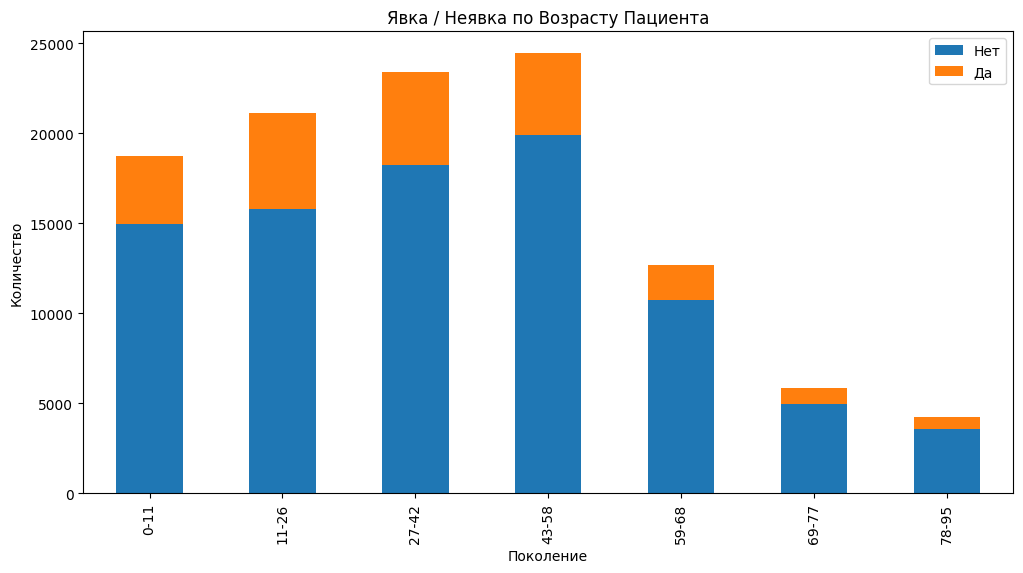

In [116]:
#group by age
by_age = no_show_at_medical.groupby(['Age_Range', 'No_Show'])['Age_Range'].count().unstack('No_Show')
by_age.plot(kind='bar',
            stacked=True,
            figsize=(12, 6),
            title='Явка / Неявка по Возрасту Пациента',
            xlabel='Поколение',
            ylabel='Количество')

#set the legend values
plt.legend(['Нет', 'Да']);

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
Пропуски состовляют где-то 20-25%. \
Процентность пропусков уменьшается с возрастом, особенно после 60, скорее всего потому, что пациенты выходят на пенсию, появляется больше свободного времени и вероятность пропустить прием уменьшается.

##### 2. Существует ли связь между полом и возрастом пациента и пропуском приема?

In [117]:
#split the data by gender and age
by_age_n_sex = no_show_at_medical.groupby(by=['Gender', 'Age'], as_index=False)[['No_Show']].sum().round()

#build a bar chart
fig = px.bar(
    data_frame=by_age_n_sex,
    x='Age',
    y='No_Show',
    color='Gender', #stack by gender
    text = 'No_Show', 
    orientation='v'
)

#set characteristics
fig.update_layout(height=500,
                  width=1100,
                  xaxis_title_text='Возраст',
                  yaxis_title_text='Количество Пропусков',
                  coloraxis_colorbar_title_text = 'Пол Пациента',
                  title_text='Распределение по Половому Признаку и Возрасту'
)

fig.show()

#log the barchart
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=1ac7f25031e04ad195cf537342991c44&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=1ac7f25031e04ad195cf537342991c44&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '1ac7f25031e04ad195cf537342991c44'}

In [118]:
#split the data by gender and age
by_agerange_n_sex = no_show_at_medical.groupby(by=['Gender', 'Age_Range'], as_index=False)[['No_Show']].sum().round()

#build a bar chart
fig = px.bar(
    data_frame=by_agerange_n_sex,
    x='Age_Range',
    y='No_Show',
    color='Gender', #stack by gender
    text = 'No_Show', 
    orientation='v'
)

#set characteristics
fig.update_layout(height=500,
                  width=1100,
                  xaxis_title_text='Поколение',
                  yaxis_title_text='Количество Пропусков',
                  coloraxis_colorbar_title_text = 'Пол Пациента',
                  title_text='Явка / Неявка по Половому Признаку и Возрасту'
)

fig.show()

#log the barchart
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=952e6ea0af6244dbb2b8d592e611f683&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=952e6ea0af6244dbb2b8d592e611f683&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '952e6ea0af6244dbb2b8d592e611f683'}

**Вывод:** \
Женщины посещают врачей намного чаще, поэтому и количество пропусков намного выше. \
По всем поколениям у женщин выше уровень непосещаемости кроме возрастов между 0-11, где лидируют мальчики, однако и здесь причина непосещаемости может ложиться на долю женщин, так как женщины чаще воспитывают детей. Мало вероятна ситуация, где мальчики даже в возрасте 11 лет будут самостоятельно ходить к врачу, а значит неявка ляжет на плачи матери.

##### 3. Существует ли связь между временем ожидания и пропуском приема?

In [119]:
#create a boxplot
fig = px.box(
    data_frame=no_show_at_medical,
    x='Waiting_Time',
    #set horizontal orientation
    orientation='h',
    title='Распределение Времени Ожидания между Днем Регистрацией и Днем Приема',
)

#set the title of the axis
fig.update_layout(
   xaxis_title_text='Дни Ожидания',
)

fig.show()

#log the barchart
experiment.log_figure(figure=fig)

{'web': 'https://www.comet.com/api/image/download?imageId=d46679ee2f4645db906afd5200b8ce4d&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=d46679ee2f4645db906afd5200b8ce4d&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': 'd46679ee2f4645db906afd5200b8ce4d'}

**Вывод:** \
Большинство приемов к врачу регистрируются в тот же день или за две недели - месяц вперед, данные после 40 дней можно считать за отклонения / выбросы. \
(однако, отклонения от нормы будут сохранены, поскольку нет информации по типу приемов)

##### 4. Существует ли связь между днем приема и пропуском приема?

In [120]:
#group by day of the week (in %-wise)
day_of_the_week = no_show_at_medical.groupby('Week_Day')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
day_of_the_week

No_Show,0,1
Week_Day,,
Friday,78.77,21.23
Monday,79.36,20.64
Saturday,76.92,23.08
Thursday,80.65,19.35
Tuesday,79.91,20.09
Wednesday,80.31,19.69


{'web': 'https://www.comet.com/api/image/download?imageId=f46f77b2b6784275aeec60e3c92186cd&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f46f77b2b6784275aeec60e3c92186cd&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': 'f46f77b2b6784275aeec60e3c92186cd'}

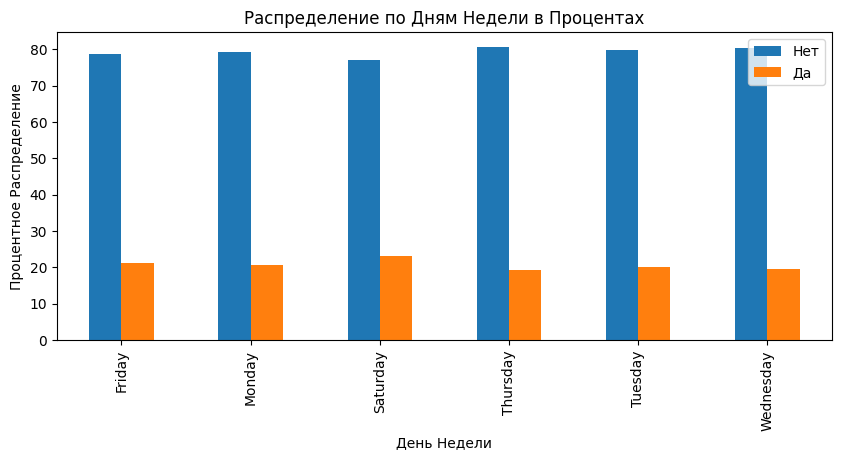

In [121]:
#create a bar chart
day_of_the_week.plot(kind='bar',
                     figsize=(10, 4),
                     xlabel='День Недели',
                     ylabel='Процентное Распределение',
                     title='Распределение по Дням Недели в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
На протяжении всей недели уровень посещений врача примерно одинаковый, немного больше пропусков по пятницам и субботам.

##### 5. Существует ли связь между тяжелым заболеванием и пропуском приема?

(а) Существует ли связь между наличием у пациента гипертонии и пропуском им приема врача?

In [122]:
#group by %-wise in hypertension
by_hypertension = no_show_at_medical.groupby('Hypertension')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_hypertension

No_Show,0,1
Hypertension,,
0,79.10,20.90
1,82.69,17.31


{'web': 'https://www.comet.com/api/image/download?imageId=1225d980c75a422f83f059ee2436e695&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=1225d980c75a422f83f059ee2436e695&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '1225d980c75a422f83f059ee2436e695'}

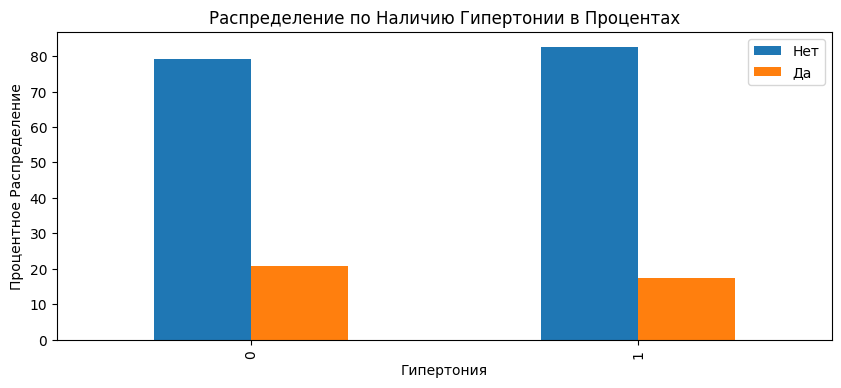

In [123]:
#create a bar chart
by_hypertension.plot(kind='bar',
                     figsize=(10, 4),
                     xlabel='Гипертония',
                     ylabel='Процентное Распределение',
                     title='Распределение по Наличию Гипертонии в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

(б) Существует ли связь между наличием у пациента диабета и пропуском им приема врача?

In [124]:
#group by %-wise in diabetes
by_diabetes = no_show_at_medical.groupby('Diabetes')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_diabetes

No_Show,0,1
Diabetes,,
0,79.64,20.36
1,81.98,18.02


{'web': 'https://www.comet.com/api/image/download?imageId=eb92406e01944c049ff9b60459ae261a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=eb92406e01944c049ff9b60459ae261a&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': 'eb92406e01944c049ff9b60459ae261a'}

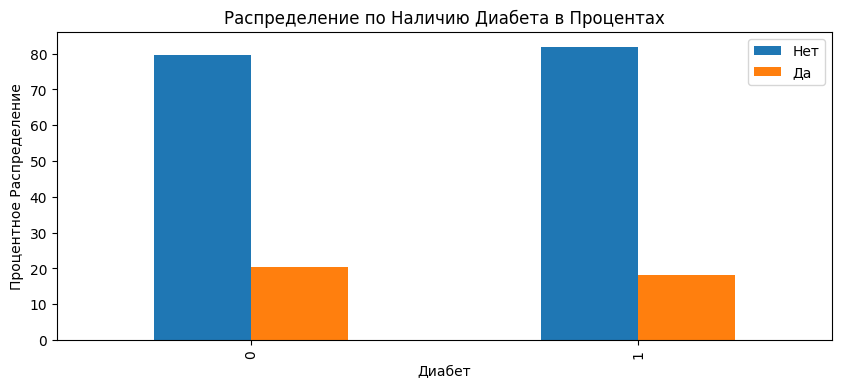

In [125]:
#create a bar chart
by_diabetes.plot(kind='bar',
                 figsize=(10, 4),
                 xlabel='Диабет',
                 ylabel='Процентное Распределение',
                 title='Распределение по Наличию Диабета в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

(в) Существует ли связь между наличием у пациента болезни алкоголизмом и пропуском им приема врача?

In [126]:
#group by %-wise in alcoholism
by_alcoholism = no_show_at_medical.groupby('Alcoholism')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_alcoholism

No_Show,0,1
Alcoholism,,
0,79.81,20.19
1,79.85,20.15


{'web': 'https://www.comet.com/api/image/download?imageId=8a2ac6d2f44b4c63be7d410858a6d1b5&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=8a2ac6d2f44b4c63be7d410858a6d1b5&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '8a2ac6d2f44b4c63be7d410858a6d1b5'}

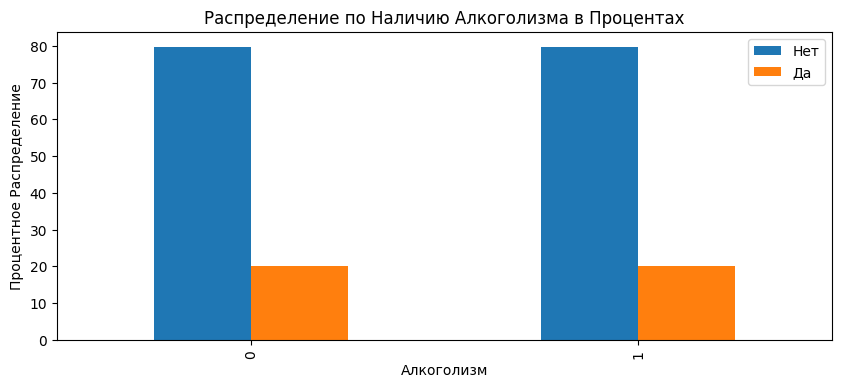

In [127]:
#create a bar chart
by_alcoholism.plot(kind='bar',
                   figsize=(10, 4),
                   xlabel='Алкоголизм',
                   ylabel='Процентное Распределение',
                   title='Распределение по Наличию Алкоголизма в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

(г) Существует ли связь между физическим или психическим недостатком у пациента и пропуском им приема?

In [128]:
#group by %-wise in handicap
by_handicap = no_show_at_medical.groupby('Handicap')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_handicap

No_Show,0,1
Handicap,,
0,79.76,20.24
1,81.97,18.03


{'web': 'https://www.comet.com/api/image/download?imageId=9bdcd7d3e6044b889c095520e2c7366c&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=9bdcd7d3e6044b889c095520e2c7366c&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '9bdcd7d3e6044b889c095520e2c7366c'}

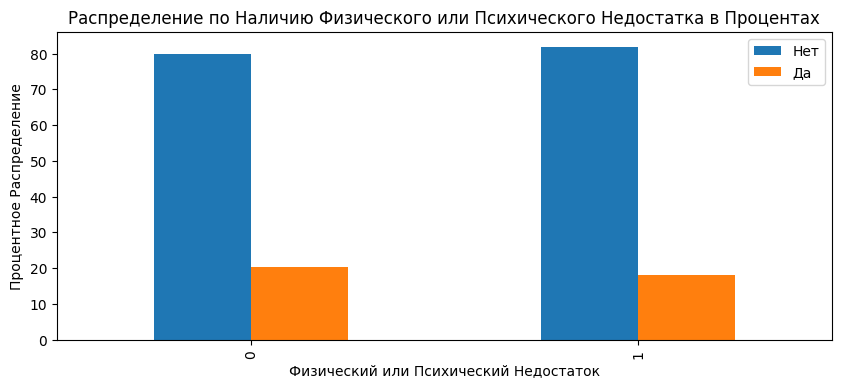

In [129]:
#create a bar chart
by_handicap.plot(kind='bar',
                 figsize=(10, 4),
                 xlabel='Физический или Психический Недостаток',
                 ylabel='Процентное Распределение',
                 title='Распределение по Наличию Физического или Психического Недостатка в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
По процентному распределению нет особой связи между тяжелым заболеванием и пропуском приема врача. \
Вне зависимости от наличия заболевания или нет 20-25% пациентом пропускают прием врача.

##### 6. Существует ли связь между районом, где живет пациент и пропуском приема врача?

In [130]:
#group by neighbourhood
by_neighbourhood = no_show_at_medical.groupby('Neighbourhood')['No_Show'].value_counts(normalize=True).unstack().sort_values(by=0, ascending=False).round(4) * 100
by_neighbourhood

No_Show,0,1
Neighbourhood,,
PARQUE INDUSTRIAL,100.00,NaN
ILHA DO BOI,91.43,8.57
AEROPORTO,87.50,12.50
MÁRIO CYPRESTE,85.44,14.56
SOLON BORGES,85.29,14.71
...,...,...
ITARARÉ,73.73,26.27
SANTA CLARA,73.52,26.48
SANTA CECÍLIA,72.54,27.46


{'web': 'https://www.comet.com/api/image/download?imageId=5641432c157a4545bcaa40d2d46250dd&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=5641432c157a4545bcaa40d2d46250dd&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '5641432c157a4545bcaa40d2d46250dd'}

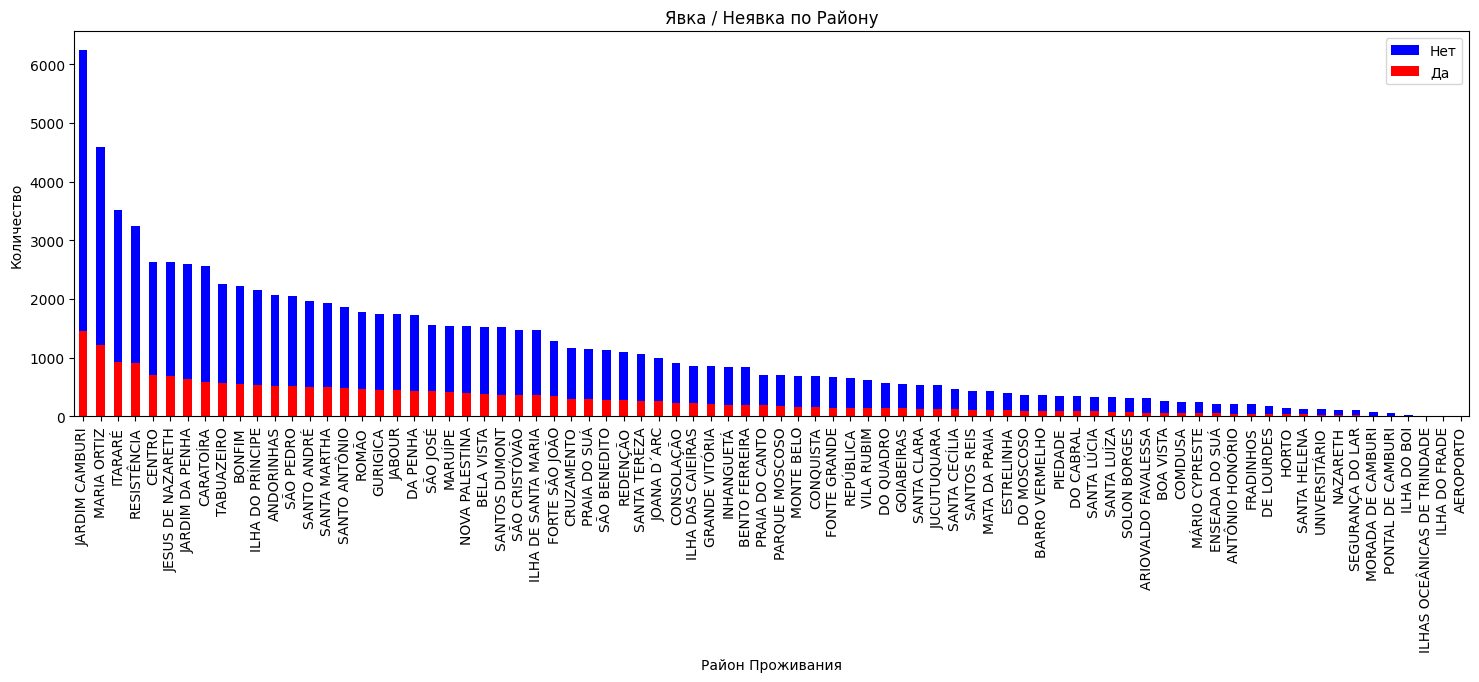

In [131]:
#create a bar chart by status
plt.figure(figsize=[18,5])
no_show_at_medical[no_show_at_medical['No_Show'] == 0]['Neighbourhood'].value_counts().plot(kind='bar', label='Present', color='blue')
no_show_at_medical[no_show_at_medical['No_Show'] == 1]['Neighbourhood'].value_counts().plot(kind='bar', label='Absent', color='red')

#set the legend values
plt.legend(['Нет', 'Да'])

plt.title('Явка / Неявка по Району')
plt.xlabel('Район Проживания')
plt.ylabel('Количество');

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
Значительной разницы между районами не наблюдается, необходима дополнительная информациях о местоположении каждого района, трантпортных веток для использования этого признака в предсказании о непосещаемости.

7. Существует ли связь между стипендией и пропуском приема врача?

In [132]:
#group by %-wise in scholarship
by_scholarship = no_show_at_medical.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_scholarship

No_Show,0,1
Scholarship,,
0,80.19,19.81
1,76.26,23.74


{'web': 'https://www.comet.com/api/image/download?imageId=83444160ed084c16b0e5dc7ea8807b94&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=83444160ed084c16b0e5dc7ea8807b94&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '83444160ed084c16b0e5dc7ea8807b94'}

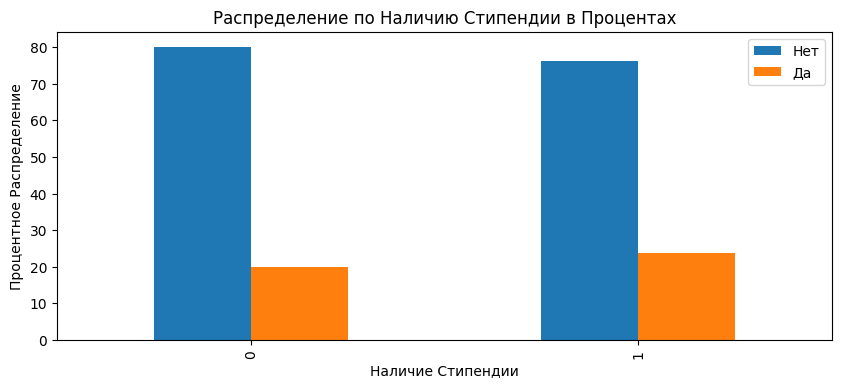

In [133]:
#create a bar chart
by_scholarship.plot(kind='bar',
                    figsize=(10, 4),
                    xlabel='Наличие Стипендии',
                    ylabel='Процентное Распределение',
                    title='Распределение по Наличию Стипендии в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
Наличие стипендии не влияет на явку или неявку к врачу.

8. Существует ли связь между напоминанием о приеме и пропуском приема врача?

In [134]:
#group by %-wise in sms received
by_sms = no_show_at_medical.groupby('SMS_Reminder')['No_Show'].value_counts(normalize=True).unstack().round(4) * 100
by_sms

No_Show,0,1
SMS_Reminder,,
0,83.30,16.70
1,72.42,27.58


{'web': 'https://www.comet.com/api/image/download?imageId=59ab038c876642e784575243a0923562&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=59ab038c876642e784575243a0923562&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'imageId': '59ab038c876642e784575243a0923562'}

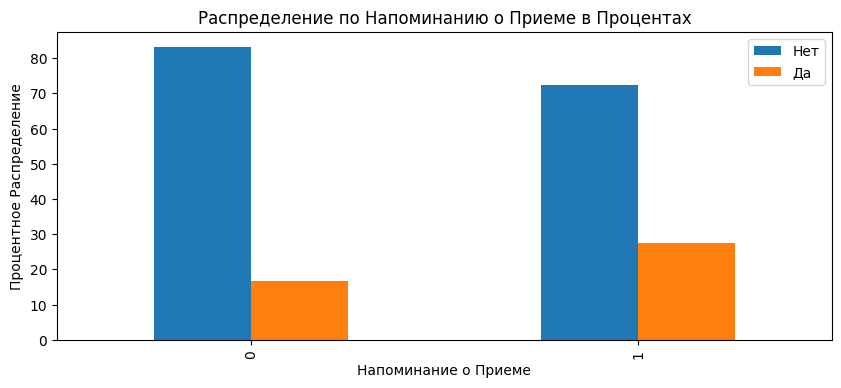

In [135]:
#create a bar chart
by_sms.plot(kind='bar',
            figsize=(10, 4),
            xlabel='Напоминание о Приеме',
            ylabel='Процентное Распределение',
            title='Распределение по Напоминанию о Приеме в Процентах')

#set the legend values
plt.legend(['Нет', 'Да'])

#log the barchart
experiment.log_figure(figure=plt)

**Вывод:** \
Напоминание о приеме улучшает посещаемость на 8-10%.

### Проектирование Признаков

##### Выбор признаков:

In [136]:
#select the variable trying to predict for y
y = no_show_at_medical[['No_Show']]

#select the features for X
X = no_show_at_medical[['Gender', 'Age_Range', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 
                        'Alcoholism', 'Handicap', 'SMS_Reminder', 'Week_Day']]

In [137]:
#convert dataframe to series
y = y.squeeze()

#check the type
type(y)

pandas.core.series.Series

##### Кодировка категориальных признаков:

In [138]:
#import the libraries
from sklearn.preprocessing import LabelEncoder

#create label encoders
labels = LabelEncoder()
X['Neighbourhood'] = labels.fit_transform(X['Neighbourhood'])

/var/folders/0j/pqz07rqd22q5j3qyrrpztqnr0000gn/T/ipykernel_18661/1904075729.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
#find categorical features
categorical_features = ['Age_Range', 'Week_Day']

#encode the features as onehot encoding using dummies
encoded_X = pd.get_dummies(X,
                           columns = categorical_features)


In [140]:
#the number of columns after encoding
list(encoded_X)

['Gender',
 'Neighbourhood',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_Reminder',
 'Age_Range_0-11',
 'Age_Range_11-26',
 'Age_Range_27-42',
 'Age_Range_43-58',
 'Age_Range_59-68',
 'Age_Range_69-77',
 'Age_Range_78-95',
 'Week_Day_Friday',
 'Week_Day_Monday',
 'Week_Day_Saturday',
 'Week_Day_Thursday',
 'Week_Day_Tuesday',
 'Week_Day_Wednesday']

In [141]:
#check that the data is without errors
encoded_X.head(3)

,Gender,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Reminder,Age_Range_0-11,Age_Range_11-26,...,Age_Range_43-58,Age_Range_59-68,Age_Range_69-77,Age_Range_78-95,Week_Day_Friday,Week_Day_Monday,Week_Day_Saturday,Week_Day_Thursday,Week_Day_Tuesday,Week_Day_Wednesday
0,1,39,0,1,0,0,0,0,False,False,...,False,True,False,False,True,False,False,False,False,False
1,0,39,0,0,0,0,0,0,False,False,...,True,False,False,False,True,False,False,False,False,False
2,1,45,0,0,0,0,0,0,False,False,...,False,True,False,False,True,False,False,False,False,False


### Шкалирование Данных

In [142]:
from sklearn.preprocessing import MinMaxScaler

#encode within a specified range
scaler = MinMaxScaler()
X = scaler.fit_transform(encoded_X)

In [143]:
print(f'Размер X: {X.shape}')
print(f'Размер y: {y.shape}')

Размер X: (110475, 21)
Размер y: (110475,)


### Построение Модели

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#initialize the probability of an event
logreg = LogisticRegression()

#set the difference in performance
random_state = 42

##### Обучение модели

In [145]:
#analyse the probability of the event occuring
logreg.fit(X, y)

LogisticRegression()

##### Логирование параметров обучения

In [146]:
params = {'random_state': random_state,
          'model_type': 'logreg'
}

In [147]:
experiment.log_parameters(params)

In [148]:
y_pred = logreg.predict(X)

##### Анализ Модели

In [149]:
accuracy = accuracy_score(y, y_pred)

print(f'Доля правильных ответов: {accuracy: 6.3f}')

Доля правильных ответов:  0.798


### Логирование Метрик

In [150]:
metrics = {'accuracy': accuracy}
metrics

{'accuracy': 0.7980810138040281}

In [151]:
experiment.log_metrics(metrics)

<img src='https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@r2yYhe2DpE4d3WKP.png' width=700px>

In [152]:
experiment.log_confusion_matrix(y.tolist(), y_pred.tolist())

{'web': 'https://www.comet.com/api/asset/download?assetId=a26b8c4ed6b749ff9f28660d4a4fd77d&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=a26b8c4ed6b749ff9f28660d4a4fd77d&experimentKey=985c41d9f81a4b318a2b42ace229af00',
 'assetId': 'a26b8c4ed6b749ff9f28660d4a4fd77d'}

In [153]:
experiment.display()

In [154]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/tori938/medical-appointment/985c41d9f81a4b318a2b42ace229af00
COMET INFO:   Metrics:
COMET INFO:     accuracy : 0.7980810138040281
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     clip              : False
COMET INFO:     copy              : True
COMET INFO:     dual              : False
COMET INFO:     feature_range     : (0, 1)
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class 